# Limits Involving Infinity
## Introduction
The symbol $\infty$ (infinity) does not represent a real number in $\mathbb{R}$. Instead, we use $\infty$ to describe the behavior of a function when the values in its domain or range outgrow all finite bounds.

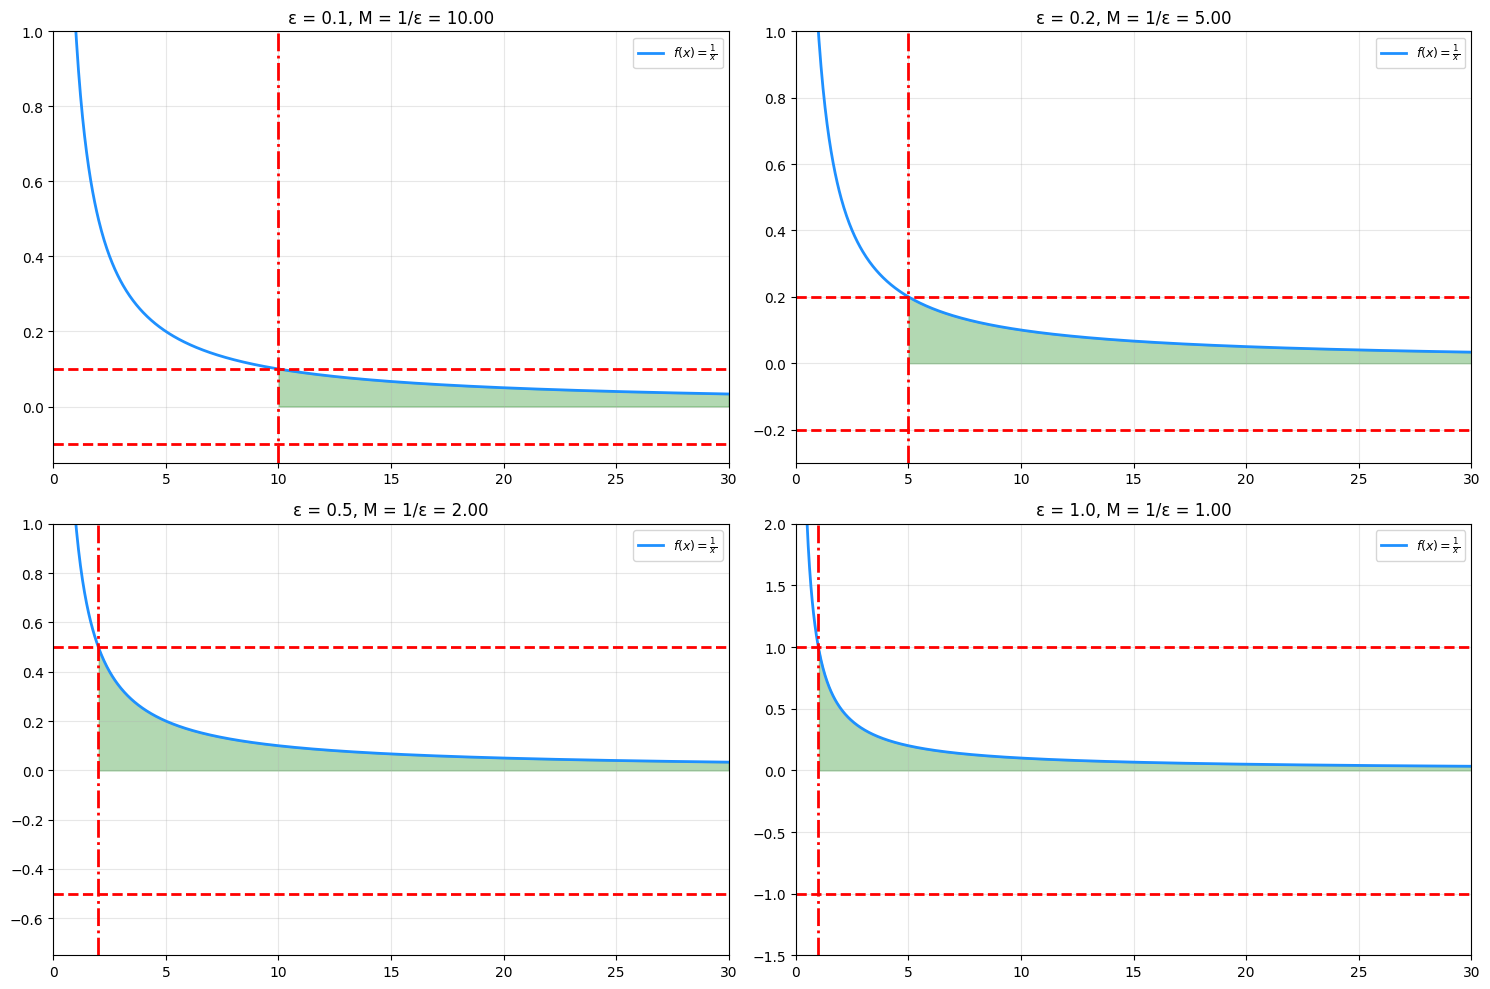

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multiple_epsilons():
    """Create multiple plots showing different epsilon values"""
    epsilon_values = [0.1, 0.2, 0.5, 1.0]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    x = np.linspace(0.1, 30, 1000)
    y = 1 / x
    
    for i, eps in enumerate(epsilon_values):
        ax = axes[i]
        M = 1 / eps
        
        # Plot main function
        ax.plot(x, y, 'dodgerblue', linewidth=2, label=r'$f(x) = \frac{1}{x}$')
        
        # Plot epsilon bounds
        ax.axhline(y=eps, color='red', linestyle='--', linewidth=2)
        ax.axhline(y=-eps, color='red', linestyle='--', linewidth=2)
        
        # Plot M line
        if M <= 30:
            ax.axvline(x=M, color='red', linestyle='-.', linewidth=2)
            
            # Highlight region
            x_highlight = x[x > M]
            y_highlight = 1 / x_highlight
            ax.fill_between(x_highlight, 0, y_highlight, alpha=0.3, color='green')
        
        ax.set_xlim(0, 30)
        ax.set_ylim(-eps * 1.5, max(1, eps * 2))
        ax.set_title(f'ε = {eps}, M = 1/ε = {M:.2f}', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=9)
    
    plt.tight_layout()
    plt.show()
plot_multiple_epsilons()

## Types of Limits Involving Infinity

### 1. Finite Limit as $x \to \pm\infty$

When we write $\lim_{x \to \infty} f(x) = L$ where $L$ is a finite number, we mean:

**Definition**: For any $\epsilon > 0$, there exists a number $M$ such that if $x > M$, then $|f(x) - L| < \epsilon$.

Similarly, $\lim_{x \to -\infty} f(x) = L$ means:

**Definition**: For any $\epsilon > 0$, there exists a number $N$ such that if $x < N$, then $|f(x) - L| < \epsilon$.

#### Examples:
- $\lim_{x \to \infty} \frac{1}{x} = 0$
- $\lim_{x \to \infty} \frac{3x + 2}{x + 1} = 3$
- $\lim_{x \to -\infty} e^x = 0$

### 2. Infinite Limits at Finite Points

When we write $\lim_{x \to a} f(x) = \infty$, we mean:

**Definition**: For any positive number $M$, there exists $\delta > 0$ such that if $0 < |x - a| < \delta$, then $f(x) > M$.

#### Examples:
- $\lim_{x \to 0} \frac{1}{x^2} = \infty$
- $\lim_{x \to 2^+} \frac{1}{x - 2} = \infty$
- $\lim_{x \to 2^-} \frac{1}{x - 2} = -\infty$

### 3. Infinite Limits at Infinity

When we write $\lim_{x \to \infty} f(x) = \infty$, we mean:

**Definition**: For any positive number $M$, there exists a number $N$ such that if $x > N$, then $f(x) > M$.

#### Examples:
- $\lim_{x \to \infty} x^2 = \infty$
- $\lim_{x \to \infty} e^x = \infty$
- $\lim_{x \to -\infty} -x^3 = \infty$



## Key Properties and Rules

### Horizontal Asymptotes
If
$$
\lim_{x \to \infty} f(x) = L \quad \text{or} \quad \lim_{x \to -\infty} f(x) = L,
$$
the line $y = L$ is called a **horizontal asymptote** of the function $f(x)$.

**Example**
$$
\lim_{x \to \infty} \frac{1}{x} = 0 \quad \text{and} \quad \lim_{x \to -\infty} \frac{1}{x} = 0
$$
Thus, the line $y = 0$ (the x-axis) is a **horizontal asymptote** of the graph $f(x) = \frac{1}{x}$.

(-10.0, 10.0)

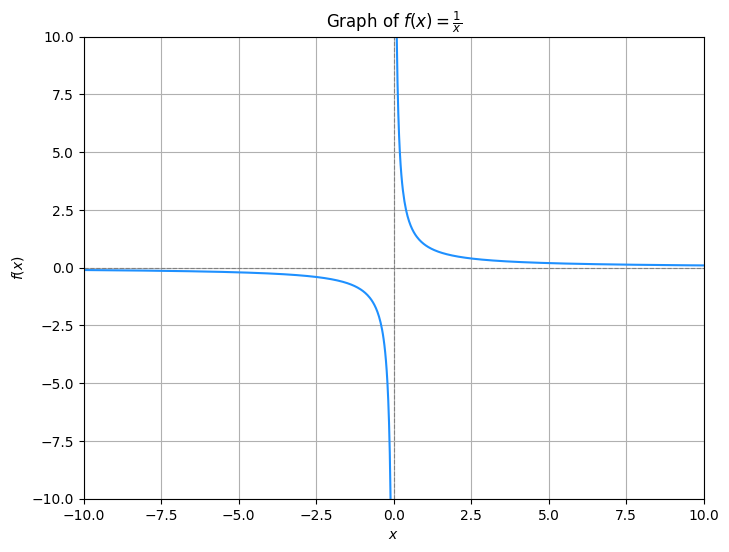

In [7]:
def horizontal_function(x):
    return 1/x

# Generate x values, avoiding x = 0
x_neg = np.linspace(-10, -0.1, 400)
x_pos = np.linspace(0.1, 10, 400)

# Calculate y values
y_neg = horizontal_function(x_neg)
y_pos = horizontal_function(x_pos)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_neg, y_neg, color='dodgerblue')
plt.plot(x_pos, y_pos, color='dodgerblue')

# Add labels and title
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Graph of $f(x) = \\frac{1}{x}$')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Horizontal asymptote at y=0
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Vertical asymptote at x=0
plt.ylim(-10, 10)
plt.xlim(-10, 10)


-----
### Real World Application of Horizontal Asymptotes
**Terminal Velocity**

This project provides a simple function to calculate the velocity of a falling object as it approaches its terminal velocity. The model is based on the formula:
$$v(t) = v_t \left(1 - e^{-k t}\right)$$
where:

  * $v(t)$ is the velocity at time $t$
  * $v\_t$ is the terminal velocity
  * $t$ is the time elapsed since the object began falling
  * $k$ is a constant related to air resistance and the object's mass

-----

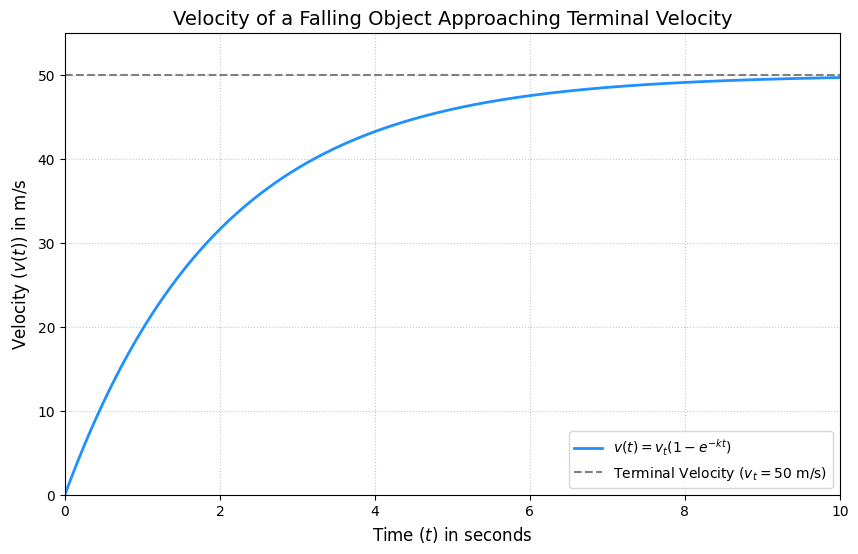

In [17]:
def terminal_velocity_function(t, v_terminal, k):
    """
    Calculates the velocity of a falling object approaching terminal velocity.

    Args:
        t (float or np.array): Time elapsed.
        v_terminal (float): The terminal velocity of the object.
        k (float): A constant related to air resistance and mass (determines
                   how quickly the object approaches terminal velocity).

    Returns:
        float or np.array: The velocity of the object at time t.
    """
    return v_terminal * (1 - np.exp(-k * t))

# --- Parameters for the simulation ---
v_t = 50  # Terminal velocity (e.g., 50 m/s)
k = 0.5   # Constant related to air resistance (e.g., 0.5 1/s)

# Generate a range of time values
t = np.linspace(0, 10, 500) # Time from 0 to 10 seconds

# Calculate the velocity at each time point
velocity = terminal_velocity_function(t, v_t, k)

# --- Plotting the graph ---
plt.figure(figsize=(10, 6)) # Set figure size for better visualization
plt.plot(t, velocity, color='dodgerblue', linewidth=2, label=r'$v(t) = v_t (1 - e^{-kt})$')

# Plot the horizontal asymptote (terminal velocity)
plt.axhline(v_t, color='gray', linestyle='--', linewidth=1.5, label=f'Terminal Velocity ($v_t = {v_t}$ m/s)')

# Add labels and title
plt.xlabel('Time ($t$) in seconds', fontsize=12)
plt.ylabel('Velocity ($v(t)$) in m/s', fontsize=12)
plt.title('Velocity of a Falling Object Approaching Terminal Velocity', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.7) # Add a subtle grid
plt.legend(fontsize=10) # Display the legend
plt.ylim(0, v_t * 1.1) # Set y-axis limits to show a bit above terminal velocity
plt.xlim(0, max(t)) # Set x-axis limits

# Customize tick marks
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

### Oblique Asymptotes
If $\lim_{x \to a^+} f(x) = \pm\infty$ or $\lim_{x \to a^-} f(x) = \pm\infty$, then the line $x = a$ is a **vertical asymptote**.

### Common Limit Rules with Infinity

1. **Sum/Difference**: 
   - $\infty + \infty = \infty$
   - $\infty - \infty$ is indeterminate
   - $L + \infty = \infty$ (where $L$ is finite)

2. **Product**:
   - $\infty \cdot \infty = \infty$
   - $L \cdot \infty = \infty$ if $L > 0$
   - $L \cdot \infty = -\infty$ if $L < 0$
   - $0 \cdot \infty$ is indeterminate

3. **Quotient**:
   - $\frac{\infty}{\infty}$ is indeterminate
   - $\frac{L}{\infty} = 0$ (where $L$ is finite)
   - $\frac{\infty}{L} = \infty$ if $L > 0$

## Indeterminate Forms

Common indeterminate forms involving infinity:
- $\frac{\infty}{\infty}$
- $\infty - \infty$
- $0 \cdot \infty$
- $\infty^0$
- $1^\infty$
- $0^0$

These require special techniques like L'Hôpital's Rule or algebraic manipulation to evaluate.

## Techniques for Evaluating Limits

### 1. For Rational Functions
Divide numerator and denominator by the highest power of $x$:

$$\lim_{x \to \infty} \frac{3x^2 + 2x + 1}{x^2 + 5} = \lim_{x \to \infty} \frac{3 + \frac{2}{x} + \frac{1}{x^2}}{1 + \frac{5}{x^2}} = \frac{3 + 0 + 0}{1 + 0} = 3$$

### 2. For Exponential Functions
Remember the behavior:
- $\lim_{x \to \infty} e^x = \infty$
- $\lim_{x \to -\infty} e^x = 0$
- $\lim_{x \to \infty} e^{-x} = 0$

### 3. L'Hôpital's Rule
For indeterminate forms $\frac{\infty}{\infty}$:

$$\lim_{x \to \infty} \frac{f(x)}{g(x)} = \lim_{x \to \infty} \frac{f'(x)}{g'(x)}$$

(provided the limit on the right exists)

## Important Notes

- Infinity is not a number but a concept describing unbounded behavior
- Always specify the direction of approach: $x \to \infty$, $x \to -\infty$, $x \to a^+$, or $x \to a^-$
- Be careful with indeterminate forms - they require special analysis
- Graph sketching can provide intuition about limit behavior